In [1]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
from sklearn.decomposition import PCA
import cv2
from sklearn.manifold import TSNE


In [2]:
path_embedding_pickle = os.path.join('..', 'densenet', 'embeddings.pkl')
df_embedding = pd.read_pickle(path_embedding_pickle)
df_embedding.head()

,image_path,identity,gallery/query,embedding
0,..\..\data\Pycnopodia_helianthoides_full_event...,0,gallery,"[0.31056636571884155, -0.13270898163318634, -0..."
1,..\..\data\Pycnopodia_helianthoides_full_event...,0,gallery,"[0.3099038302898407, -0.14680226147174835, -0...."
2,..\..\data\Pycnopodia_helianthoides_full_event...,0,gallery,"[0.3492138087749481, -0.1423846185207367, -0.1..."
3,..\..\data\Pycnopodia_helianthoides_full_event...,0,gallery,"[0.3148881494998932, -0.13102661073207855, -0...."
4,..\..\data\Pycnopodia_helianthoides_full_event...,0,gallery,"[0.3266758918762207, -0.1504051834344864, -0.1..."


In [3]:
embeddings = np.array(df_embedding['embedding'].tolist())
identities = df_embedding['identity'].tolist()
gallery_query = df_embedding['gallery/query'].tolist()

In [4]:
reducer = umap.UMAP(verbose=True, n_neighbors=15, min_dist=.2, n_components=2)
embedding_umap = reducer.fit_transform(embeddings)

UMAP(min_dist=0.2, verbose=True)
Tue May 14 19:45:30 2024 Construct fuzzy simplicial set
Tue May 14 19:45:30 2024 Finding Nearest Neighbors
Tue May 14 19:45:30 2024 Building RP forest with 9 trees
Tue May 14 19:45:34 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Tue May 14 19:45:46 2024 Finished Nearest Neighbor Search
Tue May 14 19:45:49 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue May 14 19:45:55 2024 Finished embedding


In [5]:
u0, u1 = embedding_umap[:, 0], embedding_umap[:, 1]

In [6]:
pca = PCA(n_components=len(embeddings[0]))
embedding_pca = pca.fit_transform(embeddings)

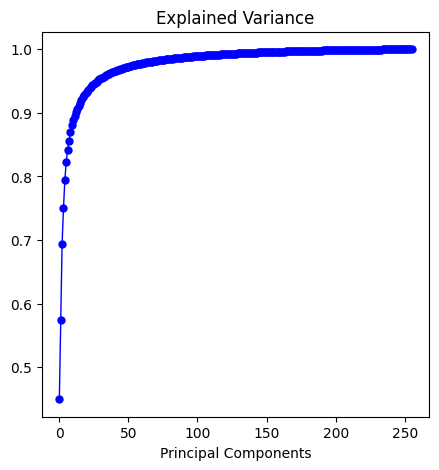

In [7]:
## explain variance plot
fig, ax = plt.subplots(figsize=(5, 5))

explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)

ax.plot(explained_variance_cumsum, marker='o', linestyle='-', markersize=5, linewidth=1, color='blue')

ax.set_title('Explained Variance')
ax.set_xlabel('Principal Components')

plt.show()
plt.close()

In [8]:
p0, p1 = embedding_pca[:, 0], embedding_pca[:, 1]

In [9]:
## tsne
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
embedding_tsne = tsne.fit_transform(embeddings)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6532 samples in 0.002s...
[t-SNE] Computed neighbors for 6532 samples in 0.816s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6532
[t-SNE] Computed conditional probabilities for sample 2000 / 6532
[t-SNE] Computed conditional probabilities for sample 3000 / 6532
[t-SNE] Computed conditional probabilities for sample 4000 / 6532
[t-SNE] Computed conditional probabilities for sample 5000 / 6532
[t-SNE] Computed conditional probabilities for sample 6000 / 6532
[t-SNE] Computed conditional probabilities for sample 6532 / 6532
[t-SNE] Mean sigma: 0.528015
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.617615
[t-SNE] KL divergence after 300 iterations: 1.748523


In [10]:
t0, t1 = embedding_tsne[:, 0], embedding_tsne[:, 1]

In [11]:
df_embedding['u0'] = u0
df_embedding['u1'] = u1
df_embedding['p0'] = p0
df_embedding['p1'] = p1
df_embedding['t0'] = t0
df_embedding['t1'] = t1

In [12]:
unique_identities = sorted(list(set(identities)))

C:\Users\wlwee\AppData\Local\Temp\ipykernel_53320\1667360685.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(unique_identities))
100%|██████████| 271/271 [00:00<00:00, 554.19it/s]


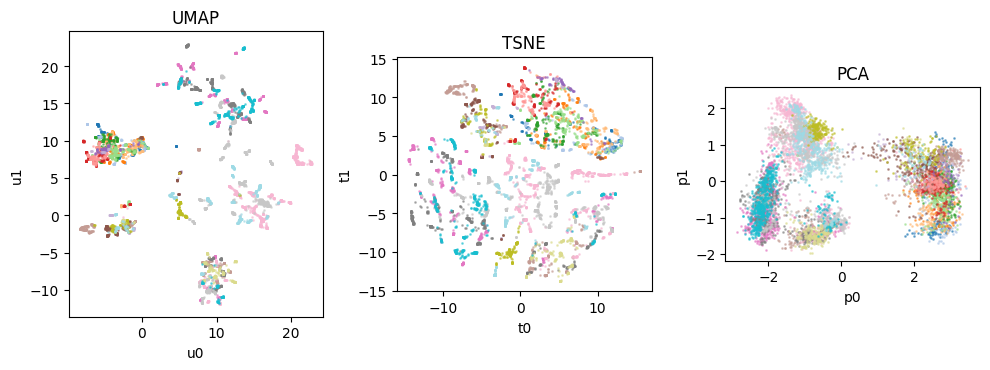

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))

cmap = cm.get_cmap('tab20', len(unique_identities))
color_map = {id: cmap(i) for i, id in enumerate(unique_identities)}
colors = [color_map[location] for location in unique_identities]

pbar = tqdm(total=len(unique_identities) , position=0, leave=True)
for i, unique_id in enumerate(unique_identities):
    mask = df_embedding['identity'] == unique_id
    df_identity = df_embedding[mask]

    c = colors[i]

    ax = axs[0]
    ax.plot(df_identity['u0'], df_identity['u1'], marker='o', linestyle='', markersize=1, linewidth=0.5, alpha=0.5, color=c)

    ax = axs[1]
    ax.plot(df_identity['t0'], df_identity['t1'], marker='o', linestyle='', markersize=1, linewidth=0.5, alpha=0.5, color=c)

    ax = axs[2]
    ax.plot(df_identity['p0'], df_identity['p1'], marker='o', linestyle='', markersize=1, linewidth=0.5, alpha=0.5, color=c)


    pbar.update(1)
pbar.close()

## labels
axs[0].set_title('UMAP')
axs[0].set_xlabel('u0')
axs[0].set_ylabel('u1')
axs[0].set_aspect('equal')

axs[1].set_title('TSNE')
axs[1].set_xlabel('t0')
axs[1].set_ylabel('t1')
axs[1].set_aspect('equal')

axs[2].set_title('PCA')
axs[2].set_xlabel('p0')
axs[2].set_ylabel('p1')
axs[2].set_aspect('equal')

fig.tight_layout()

path_fig = os.path.join('umap_tsne_pca_embeddings_pickle.png')
fig.savefig(path_fig, bbox_inches='tight', pad_inches=0, dpi=300, transparent=False)

plt.show()
plt.close()


In [14]:
path_images = df_embedding['image_path'].tolist()
os.path.exists(path_images[0])

True

In [15]:
lim_pad = 2
W, H = 256, 256 ## image width, height
K = 19 ## space strech factor
## represent images as WxH / K**2 extents
eW = W / K**2
eH = H / K**2
# Normalize u0, u1 to [0, 1] for simplicity
u0_normalized = (u0 - u0.min()) / (u0.max() - u0.min()) * K
u1_normalized = (u1 - u1.min()) / (u1.max() - u1.min()) * K

t0_normalized = (t0 - t0.min()) / (t0.max() - t0.min()) * K
t1_normalized = (t1 - t1.min()) / (t1.max() - t1.min()) * K

p0_normalized = (p0 - p0.min()) / (p0.max() - p0.min()) * K
p1_normalized = (p1 - p1.min()) / (p1.max() - p1.min()) * K


In [16]:
subsample_by = 1

images = []
pbar = tqdm(total=len(path_images) , position=0, leave=True)
for path_image in path_images:
    image = cv2.imread(path_image)
    image = cv2.resize(image, (W, H))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    image[..., 3] = np.where(np.all(image[..., :3] == 0, axis=-1), 0, 255).astype(np.uint8)
    images.append(image)
    pbar.update(1)
pbar.close()


100%|██████████| 6532/6532 [00:34<00:00, 192.06it/s]


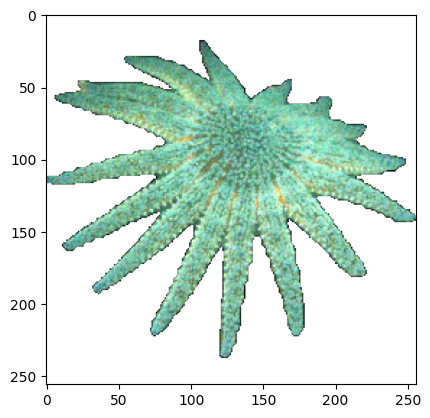

In [17]:
plt.imshow(images[0])

100%|██████████| 6532/6532 [02:14<00:00, 48.70it/s] 


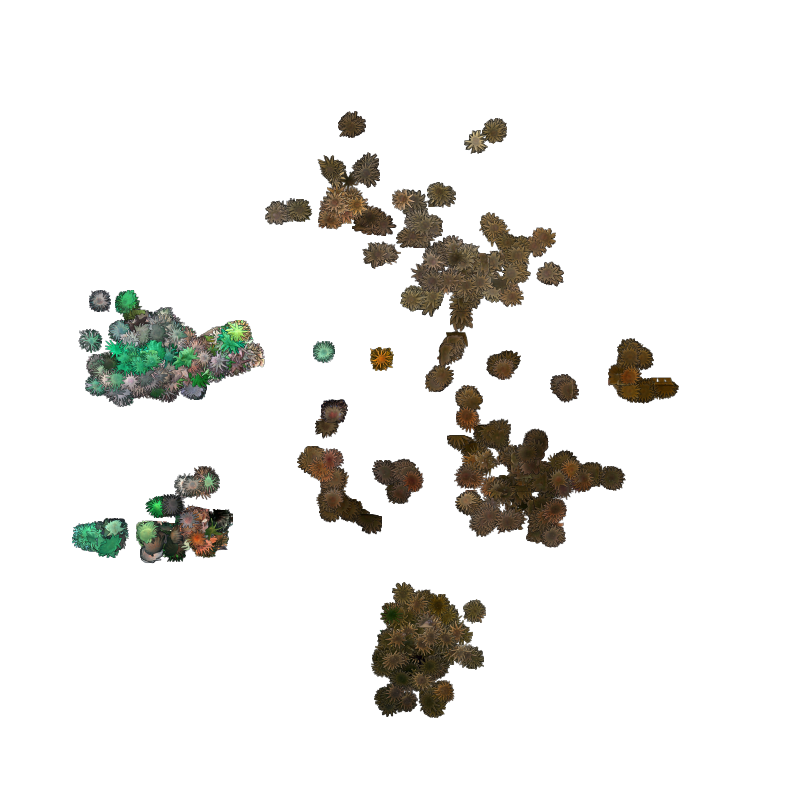

In [18]:
## visualize umap embeddings

fig, ax = plt.subplots(figsize=(10, 10))

pbar = tqdm(total=len(path_images[::subsample_by]) , position=0, leave=True)
for i in range(0, len(path_images), subsample_by):
    image = images[i]

    x = u0_normalized[i]
    y = u1_normalized[i]

    ax.imshow(image, extent=(x, x+eW, y, y+eH), aspect='auto', zorder=1, origin='upper')
    ax.scatter(x+eW/2, y+eW/2, color='white', s=1, zorder=0)

    pbar.update(1)
pbar.close()

ax.set_xlim(0-lim_pad, K+lim_pad*2)
ax.set_ylim(0-lim_pad, K+lim_pad*2)

ax.axis('off')

ax.set_aspect('equal')

path_fig = os.path.join('umap_embeddings_pickle.png')
fig.savefig(path_fig, bbox_inches='tight', pad_inches=0, dpi=600, transparent=True)

plt.show()
plt.close()

100%|██████████| 6532/6532 [02:24<00:00, 45.29it/s] 


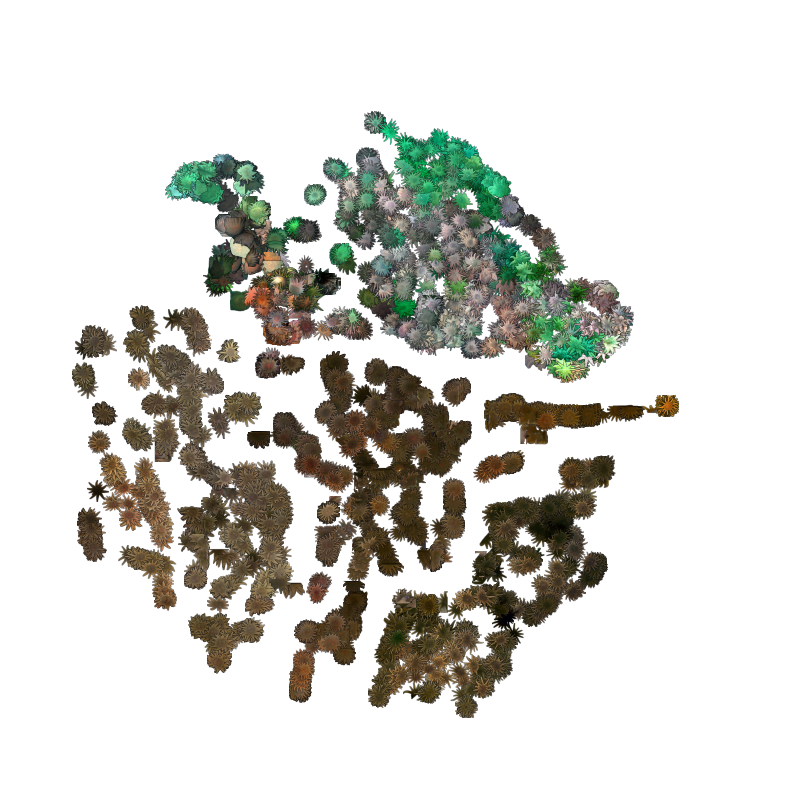

In [19]:
## visualize tsne embeddings

fig, ax = plt.subplots(figsize=(10, 10))

pbar = tqdm(total=len(path_images[::subsample_by]) , position=0, leave=True)
for i in range(0, len(path_images), subsample_by):
    image = images[i]

    x = t0_normalized[i]
    y = t1_normalized[i]

    ax.imshow(image, extent=(x, x+eW, y, y+eH), aspect='auto', zorder=1, origin='upper')
    ax.scatter(x+eW/2, y+eW/2, color='white', s=1, zorder=0)

    pbar.update(1)

pbar.close()

ax.set_xlim(0-lim_pad, K+lim_pad*2)
ax.set_ylim(0-lim_pad, K+lim_pad*2)

ax.axis('off')

ax.set_aspect('equal')

path_fig = os.path.join('tsne_embeddings_pickle.png')
fig.savefig(path_fig, bbox_inches='tight', pad_inches=0, dpi=600, transparent=True)

plt.show()
plt.close()

100%|██████████| 6532/6532 [02:13<00:00, 48.93it/s] 


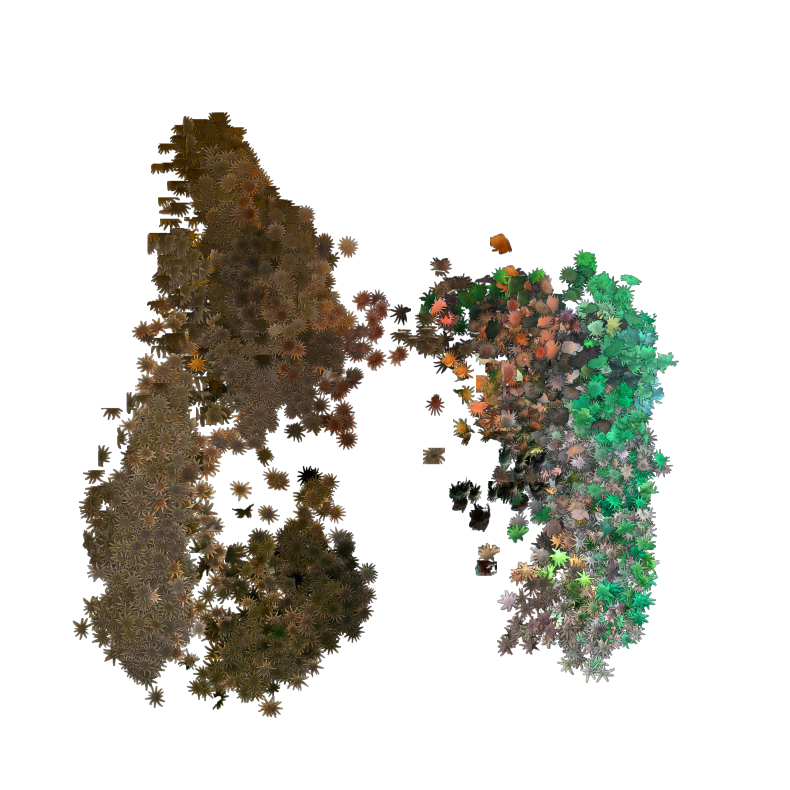

In [20]:
## visualize pca embeddings

fig, ax = plt.subplots(figsize=(10, 10))

pbar = tqdm(total=len(path_images[::subsample_by]) , position=0, leave=True)
for i in range(0, len(path_images), subsample_by):
    image = images[i]

    x = p0_normalized[i]
    y = p1_normalized[i]

    ax.imshow(image, extent=(x, x+eW, y, y+eH), aspect='auto', zorder=1, origin='upper')
    ax.scatter(x+eW/2, y+eW/2, color='white', s=1, zorder=0)

    pbar.update(1)
pbar.close()

ax.set_xlim(0-lim_pad, K+lim_pad*2)
ax.set_ylim(0-lim_pad, K+lim_pad*2)

ax.axis('off')

ax.set_aspect('equal')

path_fig = os.path.join('pca_embeddings_pickle.png')
fig.savefig(path_fig, bbox_inches='tight', pad_inches=0, dpi=600, transparent=True)

plt.show()
plt.close()